In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("/content/sampled_creditcard_data.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
1,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
2,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
3,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
4,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      20000 non-null  float64
 1   V2      20000 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [13]:
df.shape

(20000, 30)

In [14]:
df.Class.value_counts()

,count
Class,
0,19966
1,34


# Data Cleaning

In [15]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [16]:
df.duplicated().sum()

np.int64(119)

In [19]:
df = df.drop_duplicates().reset_index(drop=True)

In [20]:
df.shape

(19881, 30)

# Data Preprocessing


In [23]:

scaler = StandardScaler()
df[['Amount']] = scaler.fit_transform(df[['Amount']])


In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.210674,1
1,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.892985,0
2,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.247284,0
3,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.376368,0
4,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.379038,0


In [25]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Class' in numeric_cols:
    numeric_cols.remove('Class')

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [26]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-8.229711,4.984199,-12.260725,6.704292,-9.915510,-2.134097,-13.535251,6.253000,-7.686597,-12.746360,...,1.668348,-1.570934,-3.830795,1.113955,-2.722976,-0.966510,-4.819365,-3.037407,1.210674,1
1,0.182285,-1.586386,-0.099422,-0.977644,-1.038496,0.778736,-0.419688,0.187282,0.824203,-0.515432,...,-0.296632,-1.314983,-0.854279,-1.906666,0.581688,-1.557203,0.086693,0.306475,1.892985,0
2,0.710844,-0.337634,0.099386,-0.726703,-0.382842,0.040408,-0.572259,0.002846,-0.869029,0.678129,...,0.145340,0.220615,-0.269004,-1.334471,0.953118,-0.487059,0.016215,0.021976,-0.247284,0
3,-0.202688,0.960738,-1.107813,-0.246767,0.570561,-0.467552,0.230012,0.488322,-0.428387,-1.248318,...,0.504330,1.195774,-0.288508,-0.025729,-0.411875,-0.331869,-0.576434,0.014090,-0.376368,0
4,1.017358,-0.074719,-0.678575,0.230579,-0.125626,-0.714249,0.040503,-0.132756,0.338801,0.229037,...,-0.331908,-0.864138,0.565706,0.104195,-0.704624,0.359952,-0.196867,-0.197683,-0.379038,0


# Exploratory Data Analysis


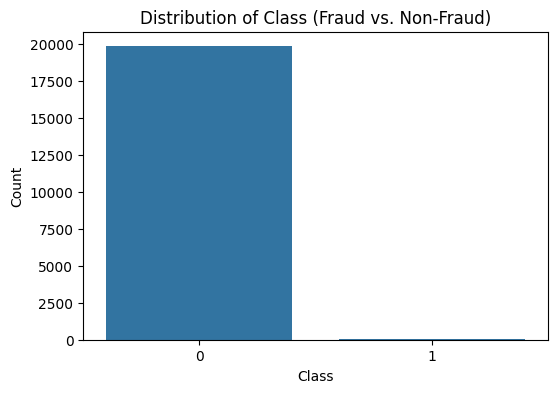

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class (Fraud vs. Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

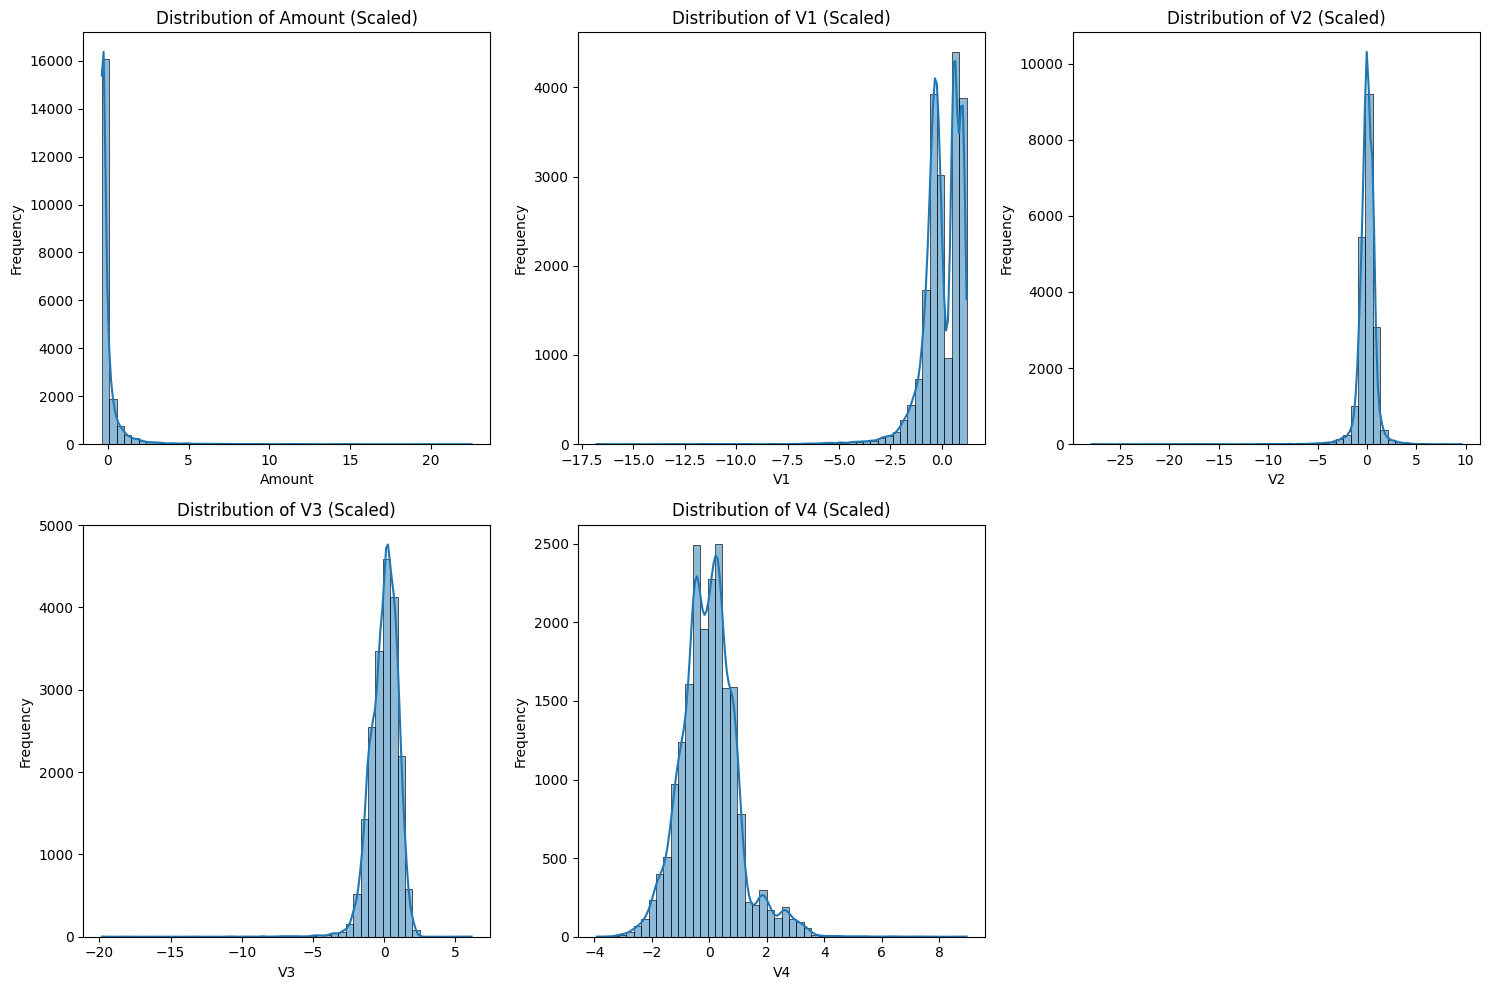

In [28]:
selected_features = ['Amount', 'V1', 'V2', 'V3', 'V4']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature} (Scaled)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

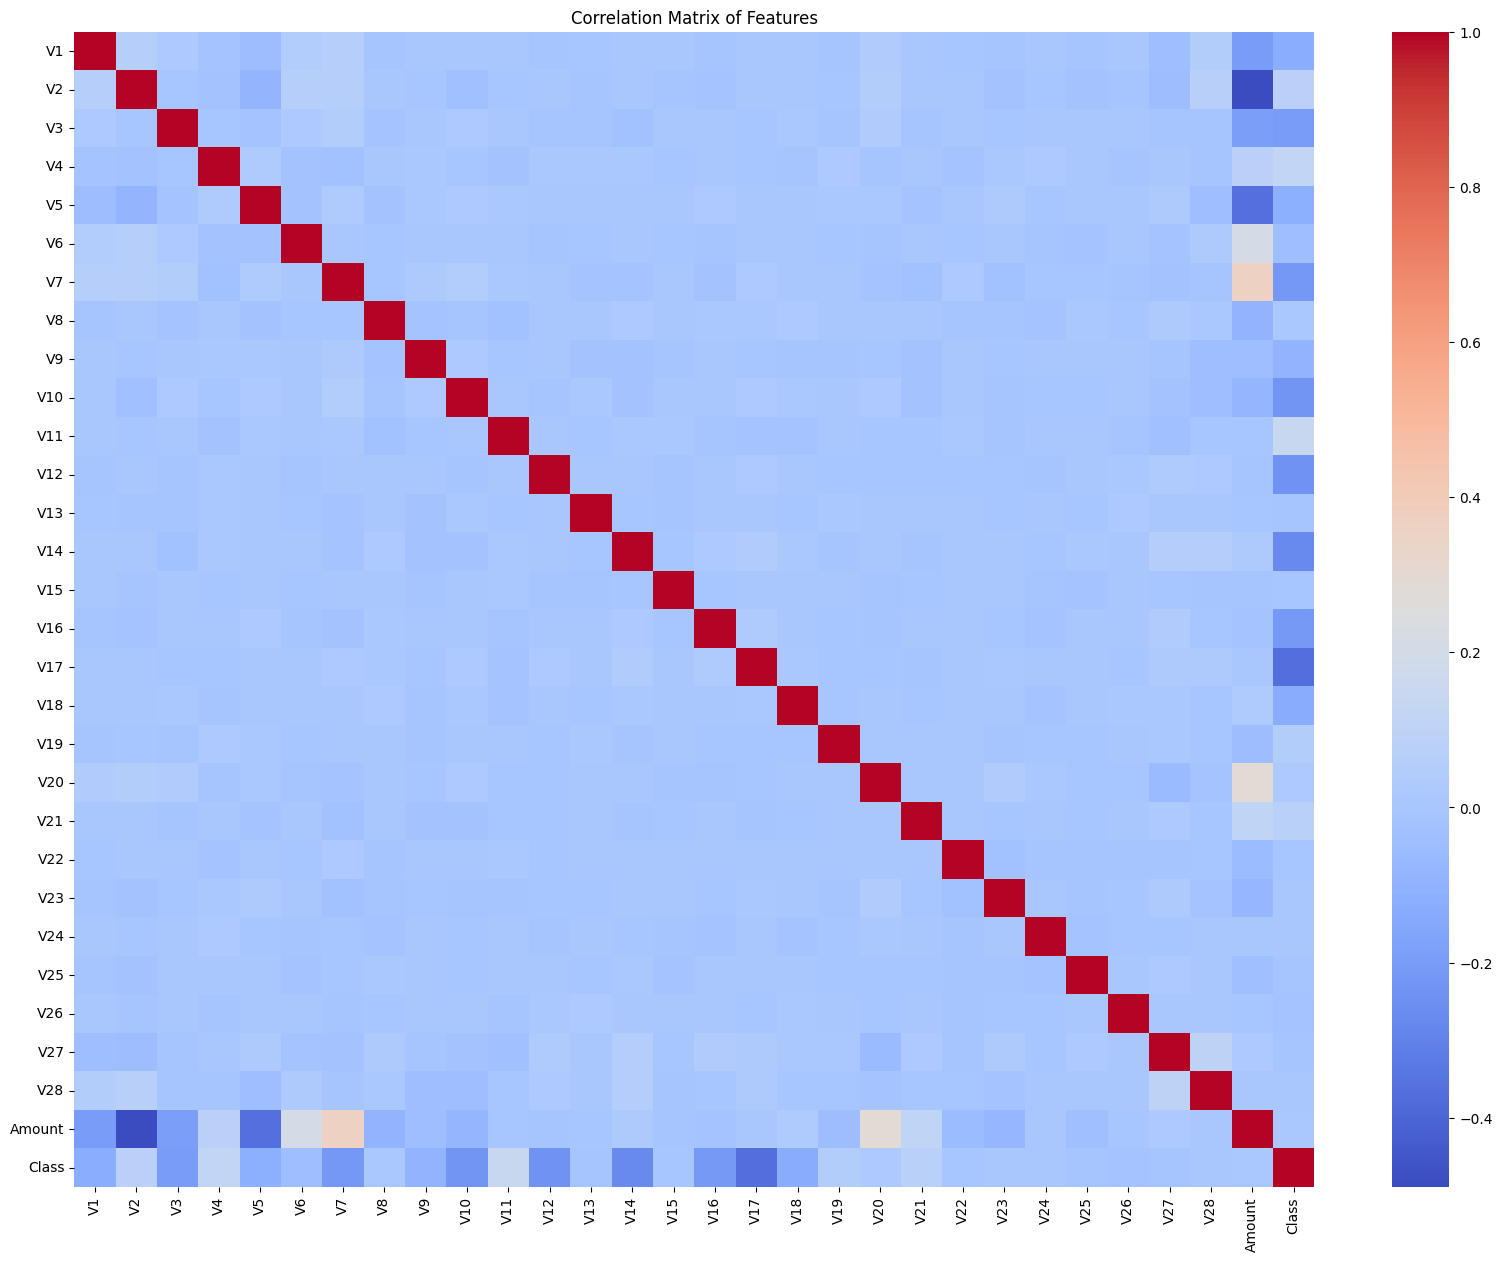

In [29]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Splitting the data

In [30]:
x = df.drop('Class', axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [31]:

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
}

# Training the Models

In [32]:
for model_name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)

  print("Model Name : ", model_name)
  print()

  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print()

  print(f"Model Accuracy: {accuracy*100:.2f}")

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  print()

Model Name :  Logistic Regression

Confusion Matrix:
[[3969    1]
 [   3    4]]

Model Accuracy: 99.90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3970
           1       0.80      0.57      0.67         7

    accuracy                           1.00      3977
   macro avg       0.90      0.79      0.83      3977
weighted avg       1.00      1.00      1.00      3977


Model Name :  Random Forest

Confusion Matrix:
[[3968    2]
 [   2    5]]

Model Accuracy: 99.90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3970
           1       0.71      0.71      0.71         7

    accuracy                           1.00      3977
   macro avg       0.86      0.86      0.86      3977
weighted avg       1.00      1.00      1.00      3977


Model Name :  Gradient Boosting

Confusion Matrix:
[[3967    3]
 [   3    4]]

Model Accuracy: 9

In [33]:
best_accuracy = 0
best_model_name = ""

for model_name, model in models.items():
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model_name = model_name

print("Best Model : ", best_model_name)
print(f"Best Model Accuracy: {best_accuracy*100:.2f}")

Best Model :  Logistic Regression
Best Model Accuracy: 99.90
